# Basal Scaling for Nu<sub>Top</sub>, Nu<sub>Bottom</sub>, and V<sub>RMS</sub>

In [1]:
# %reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import glob
from IPython.display import set_matplotlib_formats
from scipy.optimize import curve_fit
import re
import matplotlib.ticker as mticker
import math
from sklearn.metrics import r2_score
import matplotlib.ticker as ticker
from sklearn.metrics import r2_score

# %config InlineBackend.figure_formats = ['svg']

In [2]:
# plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 350
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 12.
plt.rcParams['lines.markeredgewidth'] = 0.7
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14

In [3]:
save_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Data\\'
Data=pd.read_csv(save_path+'data_short.csv')
Data

,Ra,NuT,NuB,VRMS,Surface
0,1.000000e+04,4.656117,4.656052,34.289954,31.914000
1,1.000000e+05,11.254625,11.254650,168.172663,165.990000
2,1.000000e+06,23.502768,23.502513,703.962729,710.800000
3,3.000000e+06,31.097748,31.097102,1728.708096,1861.388378
4,1.000000e+07,45.598467,45.599319,3732.439045,4010.006207
5,3.000000e+07,62.639594,62.539980,6915.399625,7357.209091
6,1.000000e+08,92.484450,92.242470,14745.362244,15468.777512
7,3.000000e+08,113.137404,113.297158,17386.847212,16552.034302
8,6.000000e+08,145.749153,145.132127,30136.178700,28953.937824
9,1.000000e+09,174.398691,172.451075,39692.511465,37128.398551


In [4]:
RaU = Data.Ra.unique()
lenRa = len(RaU)

dataS = [[] for i in range(lenRa)] #empty nested list for largest resolution value

for i in range(lenRa):
    dataS[i] = Data.loc[(Data['Ra'] == RaU[i])]
    
colors = plt.cm.gist_rainbow(np.linspace(0,0.9,lenRa))

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)

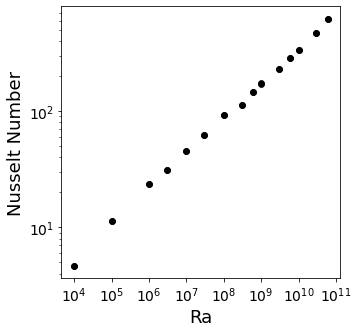

In [5]:
nu = plt.figure()
plt.plot(Data['Ra'],Data['NuT'],'.',color='black')
plt.plot(Data['Ra'],Data['NuB'],'.',color='black')
plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');
plt.xticks(np.logspace(4,11,num=8));
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'raw_nu.png',pad_inches=0.1,bbox_inches='tight');

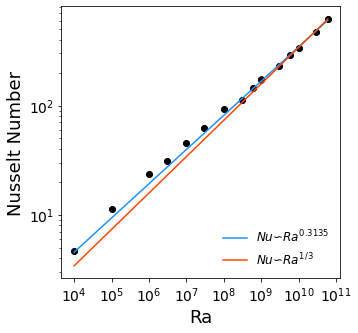

In [6]:
list_Ra_Nu = [Data['Ra'].values.tolist(),Data['Ra'].values.tolist()]
list_Ra_Nu = [x for mini_list in list_Ra_Nu for x in mini_list] 

list_Nu = [Data['NuT'].values.tolist(),Data['NuB'].values.tolist()]
list_Nu = [x for mini_list in list_Nu for x in mini_list]

nu = plt.figure()
plt.plot(Data['Ra'],Data['NuT'],'.',color='black')
plt.plot(Data['Ra'],Data['NuB'],'.',color='black')
plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol_Nu(x,a,b):
    return b*x**a
def fol2_Nu(x,a):
    return a*x**(1/3)

m1_Nu, _ = curve_fit(fol_Nu,list_Ra_Nu,list_Nu); m2_Nu, _ = curve_fit(fol2_Nu,list_Ra_Nu,list_Nu)

xx = np.arange(1e4,np.max(RaU),1e4)
s_nu='{}'.format(round(m1_Nu[0],4));

plt.plot(xx,fol_Nu(xx,m1_Nu[0],m1_Nu[1]),label=r'$Nu \backsim Ra^{'+s_nu+'}$', color='dodgerblue')
plt.plot(xx,fol2_Nu(xx,m2_Nu[0]),label=r'$Nu \backsim Ra^{1/3}$', color='orangered');

plt.xticks(np.logspace(4,11,num=8));
plt.legend(frameon=False,prop={'size': 12},loc='lower right');

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'scaling_nu.png',pad_inches=0.1,bbox_inches='tight');

In [7]:
popt_Nu, pcov_Nu = curve_fit(fol_Nu,list_Ra_Nu,list_Nu)
y_pred_Nu = fol_Nu(list_Ra_Nu, *popt_Nu)
r2_score(list_Nu, y_pred_Nu) #BEST FIT

0.9977680807789717

In [8]:
popt2_Nu, pcov2_Nu = curve_fit(fol2_Nu,list_Ra_Nu,list_Nu)
y_pred2_Nu = fol2_Nu(np.array(list_Ra_Nu), popt2_Nu[0])
r2_score(list_Nu, y_pred2_Nu) #Force 1/3

0.9961665433857639

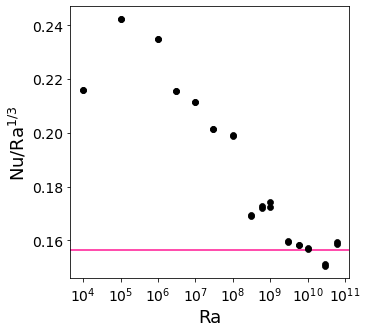

In [9]:
nu = plt.figure()
nuVSra = Data['NuT']/(Data['Ra']**(1/3))
plt.axhline(np.mean(nuVSra[lenRa-4:lenRa]),color='deeppink');

plt.plot(Data['Ra'],nuVSra,'.',color='black')
plt.plot(Data['Ra'],Data['NuB']/(Data['Ra']**(1/3)),'.',color='black')

plt.ylabel('Nu/Ra$^{1/3}$'); plt.xlabel('Ra');
plt.xscale('log');
plt.xticks(np.logspace(4,11,num=8));

plt.savefig(image_path + 'nu ratio.png',pad_inches=0.1,bbox_inches='tight');

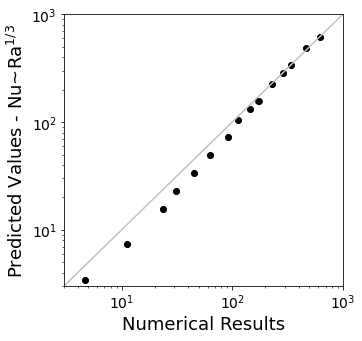

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

plt.plot(list_Nu,y_pred2_Nu,'.',color='black')

plt.axline((0.5, 0.5), slope=1,color='#c0c2c0');
plt.xlim(3,1000);plt.ylim(3,1000); plt.yscale('log'); plt.xscale('log');
plt.xlabel('Numerical Results'); plt.ylabel('Predicted Values - Nu~Ra$^{1/3}$')

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'nu predicted vs results.png',pad_inches=0.1,bbox_inches='tight');

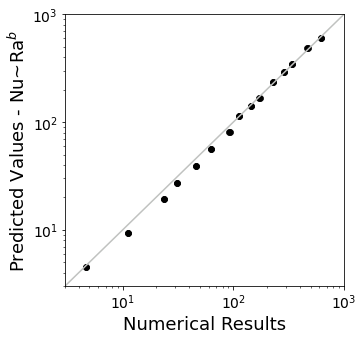

In [11]:
fig = plt.figure(figsize=(5,5))

plt.plot(list_Nu,y_pred_Nu,'.',color='black')

plt.axline((0.5, 0.5), slope=1,color='#c0c2c0');
plt.xlim(3,1000);plt.ylim(3,1000); plt.yscale('log'); plt.xscale('log');
plt.xlabel('Numerical Results'); plt.ylabel('Predicted Values - Nu~Ra$^{b}$')

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'nu predicted vs results best fit.png',pad_inches=0.1,bbox_inches='tight');

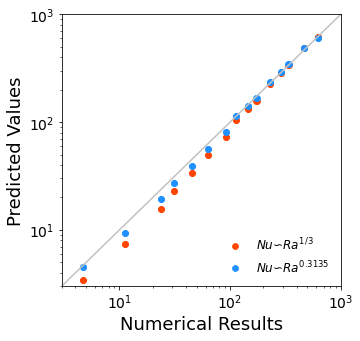

In [12]:
fig = plt.figure(figsize=(5,5))

plt.plot(list_Nu,y_pred2_Nu,'.', label=r'$Nu \backsim Ra^{1/3}$', color='orangered')
plt.plot(list_Nu,y_pred_Nu,'.', label=r'$Nu \backsim Ra^{'+s_nu+'}$', color='dodgerblue')
plt.legend(frameon=False,prop={'size': 12},loc='lower right');
plt.axline((0.5, 0.5), slope=1,color='#c0c2c0');
plt.xlim(3,1000);plt.ylim(3,1000);

plt.xlabel('Numerical Results'); plt.ylabel('Predicted Values')
plt.yscale('log'); plt.xscale('log');

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'nu predicted vs results both.png',pad_inches=0.1,bbox_inches='tight');

## Plot Nu Raw + Fit

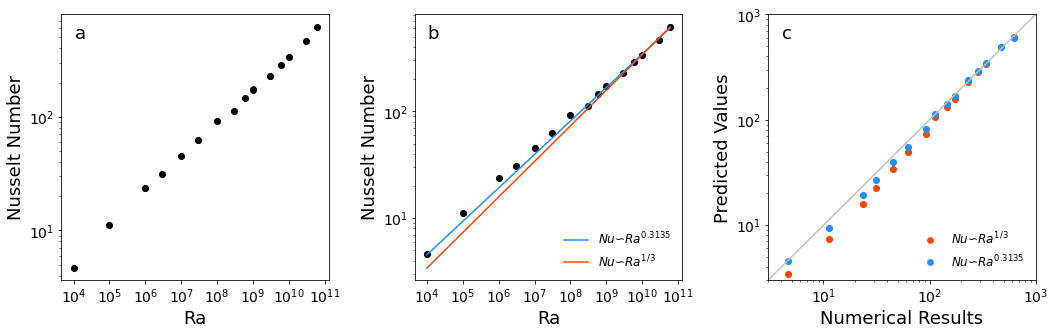

In [13]:
fig = plt.figure(figsize=(15,5))

ax1 = plt.subplot(1,3,1)
plt.plot(Data['Ra'],Data['NuT'],'.',color='black')
plt.plot(Data['Ra'],Data['NuB'],'.',color='black')
plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');
plt.xticks(np.logspace(4,11,num=8));
ax = plt.gca();

ax2 = plt.subplot(1,3,2)
plt.plot(Data['Ra'],Data['NuT'],'.',color='black')
plt.plot(Data['Ra'],Data['NuB'],'.',color='black'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');plt.ylabel('Nusselt Number');
#plot lines
plt.plot(xx,fol_Nu(xx,m1_Nu[0],m1_Nu[1]),label=r'$Nu \backsim Ra^{'+s_nu+'}$', color='dodgerblue')
plt.plot(xx,fol2_Nu(xx,m2_Nu[0]),label=r'$Nu \backsim Ra^{1/3}$', color='orangered');
plt.xticks(np.logspace(4,11,num=8));
plt.legend(frameon=False,prop={'size': 12},loc='lower right');
# plt.setp(ax2.get_yticklabels(), visible=False)

ax3 = plt.subplot(1,3,3)
plt.plot(list_Nu,y_pred2_Nu,'.', label=r'$Nu \backsim Ra^{1/3}$', color='orangered')
plt.plot(list_Nu,y_pred_Nu,'.', label=r'$Nu \backsim Ra^{'+s_nu+'}$', color='dodgerblue')
plt.legend(frameon=False,prop={'size': 12},loc='lower right');
plt.axline((0.5, 0.5), slope=1,color='#c0c2c0');
plt.xlim(3,1000);plt.ylim(3,1000);
plt.xlabel('Numerical Results'); plt.ylabel('Predicted Values')
plt.yscale('log'); plt.xscale('log');
fig.tight_layout()

plt.text(0.07, 0.93, 'a', horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes)
plt.text(0.07, 0.93, 'b', horizontalalignment='center', verticalalignment='center', transform = ax2.transAxes)
plt.text(0.07, 0.93, 'c', horizontalalignment='center', verticalalignment='center', transform = ax3.transAxes)


image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'nu_multi.png',pad_inches=0.1,bbox_inches='tight');

## Velocity

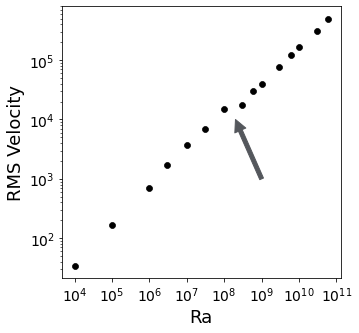

In [14]:
nu = plt.figure()
plt.plot(Data['Ra'],Data['VRMS'],'.',color='black')
    
plt.ylabel('RMS Velocity'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

plt.annotate('', xy=(2e8, 10000), xytext=(1e9, 1000),arrowprops=dict(facecolor='#54575c',edgecolor='#54575c'))

plt.xticks(np.logspace(4,11,num=8));
image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'raw_vrms.png',pad_inches=0.1,bbox_inches='tight');

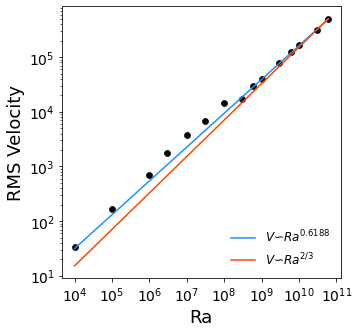

In [15]:
list1 = Data['Ra']; list2 = Data['VRMS'];

plt.plot(Data['Ra'],Data['VRMS'],'.',color='black')
plt.ylabel('RMS Velocity'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol_v(x,a,b):
    return b*x**a
def fol2_v(x,a):
    return a*x**(2/3)

m1_v, _ = curve_fit(fol_v,Data['Ra'],Data['VRMS']); m2_v, _ = curve_fit(fol2_v,Data['Ra'],Data['VRMS'])

xx = np.arange(1e4,np.max(RaU),1e4)
s='{}'.format(round(m1_v[0],4));

plt.plot(xx,fol_v(xx,m1_v[0],m1_v[1]),label=r'$V \backsim Ra^{'+s+'}$', color='dodgerblue');
plt.plot(xx,fol2_v(xx,m2_v[0]),label=r'$V \backsim Ra^{2/3}$', color='orangered');
plt.xticks(np.logspace(4,11,num=8));
plt.legend(frameon=False,prop={'size': 12},loc='lower right');

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'scaling_vrms.png',pad_inches=0.1,bbox_inches='tight');

In [16]:
popt_v, pcov_v = curve_fit(fol_v,Data['Ra'],Data['VRMS'])
y_pred_v = fol_v(Data['Ra'], *popt_v)
r2_score(Data['VRMS'], y_pred_v) #BEST FIT

0.9995490732632946

In [17]:
popt2_v, pcov2_v = curve_fit(fol2_v,Data['Ra'],Data['VRMS'])
y_pred2_v = fol2_v(np.array(Data['Ra']), popt2_v[0])
r2_score(Data['VRMS'], y_pred2_v) #FORCE 2/3

0.99783888694478

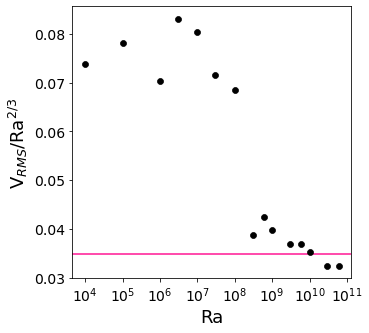

In [18]:
nu = plt.figure()
vVSra = Data['VRMS']/(Data['Ra']**(2/3))
plt.axhline(np.mean(vVSra[lenRa-5:lenRa]),color='deeppink');

plt.plot(Data['Ra'],vVSra,'.',color='black')

plt.ylabel('V$_{RMS}$/Ra$^{2/3}$'); plt.xlabel('Ra');
plt.xscale('log');
plt.xticks(np.logspace(4,11,num=8));

plt.savefig(image_path + 'valo_ratio.png',pad_inches=0.1,bbox_inches='tight');

## 1:1 Comparison VRMS

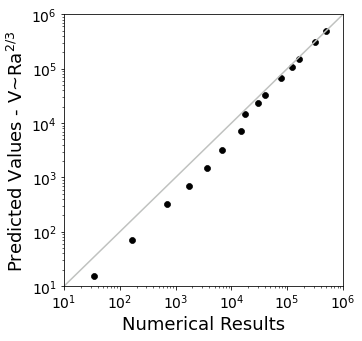

In [19]:
fig = plt.figure(figsize=(5,5))

plt.plot(Data['VRMS'],y_pred2_v,'.',color='black')
plt.axline((0.5, 0.5), slope=1,color='#c0c2c0');
plt.xlim(10,1e6);plt.ylim(10,1e6);
plt.xlabel('Numerical Results'); plt.ylabel('Predicted Values - V~Ra$^{2/3}$')
plt.yscale('log'); plt.xscale('log');

# image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'vrms predicted vs results classic.png',pad_inches=0.1,bbox_inches='tight');

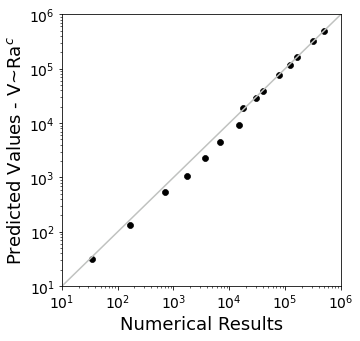

In [20]:
fig = plt.figure(figsize=(5,5))

plt.plot(Data['VRMS'],y_pred_v,'.',color='black')
plt.axline((0.5, 0.5), slope=1,color='#c0c2c0');
plt.xlim(10,1e6); plt.ylim(10,1e6);
plt.xlabel('Numerical Results'); plt.ylabel('Predicted Values - V~Ra$^{c}$')
plt.yscale('log'); plt.xscale('log');

# image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'vrms predicted vs results best.png',pad_inches=0.1,bbox_inches='tight');

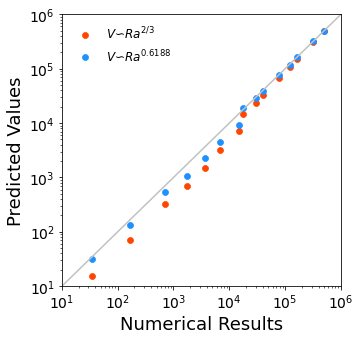

In [21]:
fig = plt.figure(figsize=(5,5))

s='{}'.format(round(popt_v[0],4));
plt.plot(Data['VRMS'],y_pred2_v,'.',color='orangered', label=r'$V \backsim Ra^{2/3}$')
plt.plot(Data['VRMS'],y_pred_v,'.',color='dodgerblue', label=r'$V \backsim Ra^{'+s+'}$')
plt.legend(frameon=False,prop={'size': 12},loc='best');
plt.axline((0.5, 0.5), slope=1,color='#c0c2c0');
plt.xlim(10,1e6);plt.ylim(10,1e6);
plt.xlabel('Numerical Results'); plt.ylabel('Predicted Values')
plt.yscale('log'); plt.xscale('log');

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'vrms predicted vs results both.png',pad_inches=0.1,bbox_inches='tight');

## VRMS Both

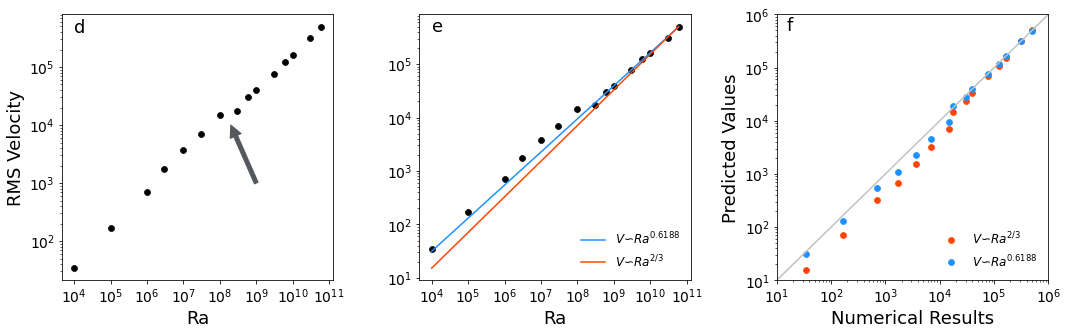

In [22]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(Data['Ra'],Data['VRMS'],'.',color='black') 
plt.ylabel('RMS Velocity'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');
plt.annotate('', xy=(2e8, 10000), xytext=(1e9, 1000),arrowprops=dict(facecolor='#54575c',edgecolor='#54575c'))
plt.xticks(np.logspace(4,11,num=8)); plt.text(1e4,4e5,'d');

ax2 = plt.subplot(1,3,2)
plt.plot(Data['Ra'],Data['VRMS'],'.',color='black')
plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

plt.plot(xx,fol_v(xx,m1_v[0],m1_v[1]),label=r'$V \backsim Ra^{'+s+'}$', color='dodgerblue')
plt.plot(xx,fol2_v(xx,m2_v[0]),label=r'$V \backsim Ra^{2/3}$', color='orangered');
plt.xticks(np.logspace(4,11,num=8));
plt.legend(frameon=False,prop={'size': 12},loc='lower right');
# plt.setp(ax2.get_yticklabels(), visible=False)
plt.text(1e4,4e5,'e');

ax3 = plt.subplot(1,3,3)
s='{}'.format(round(popt_v[0],4));
plt.plot(Data['VRMS'],y_pred2_v,'.',color='orangered', label=r'$V \backsim Ra^{2/3}$')
plt.plot(Data['VRMS'],y_pred_v,'.',color='dodgerblue', label=r'$V \backsim Ra^{'+s+'}$')
plt.legend(frameon=False,prop={'size': 12},loc='lower right');
plt.axline((0.5, 0.5), slope=1,color='#c0c2c0');
plt.xlim(10,1e6);plt.ylim(10,1e6);
plt.xlabel('Numerical Results'); plt.ylabel('Predicted Values')
plt.yscale('log'); plt.xscale('log');
plt.text(15,5e5,'f');

fig.tight_layout()

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'v_multi.png',pad_inches=0.1,bbox_inches='tight');

## 6 panel

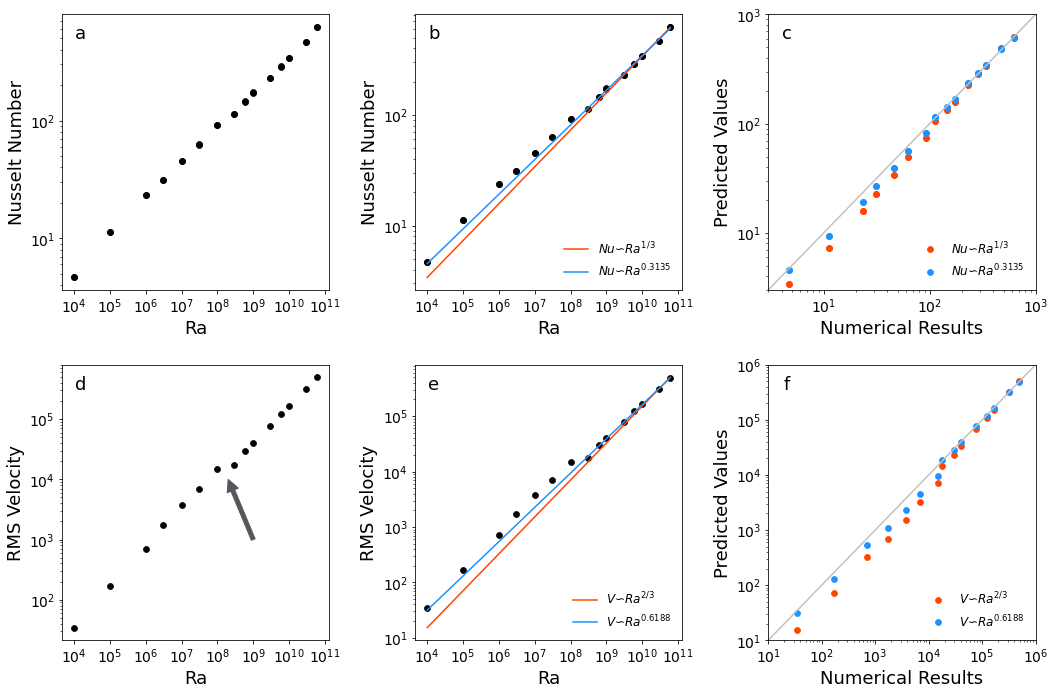

In [23]:
fig, axs = plt.subplot_mosaic("ABC;DEF", figsize=(15,10),facecolor='white')

ax1 = plt.subplot(2,3,1)
plt.plot(Data['Ra'],Data['NuT'],'.',color='black')
plt.plot(Data['Ra'],Data['NuB'],'.',color='black')
plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');
plt.xticks(np.logspace(4,11,num=8));

ax2 = plt.subplot(2,3,2)
plt.plot(Data['Ra'],Data['NuT'],'.',color='black')
plt.plot(Data['Ra'],Data['NuB'],'.',color='black'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');plt.ylabel('Nusselt Number');
plt.plot(xx,fol2_Nu(xx,m2_Nu[0]),label=r'$Nu \backsim Ra^{1/3}$', color='orangered');
plt.plot(xx,fol_Nu(xx,m1_Nu[0],m1_Nu[1]),label=r'$Nu \backsim Ra^{'+s_nu+'}$', color='dodgerblue')
plt.xticks(np.logspace(4,11,num=8));
plt.legend(frameon=False,prop={'size': 12},loc='lower right');

ax3 = plt.subplot(2,3,3)
plt.plot(list_Nu,y_pred2_Nu,'.', label=r'$Nu \backsim Ra^{1/3}$', color='orangered')
plt.plot(list_Nu,y_pred_Nu,'.', label=r'$Nu \backsim Ra^{'+s_nu+'}$', color='dodgerblue')
plt.legend(frameon=False,prop={'size': 12},loc='lower right');
plt.axline((0.5, 0.5), slope=1,color='#c0c2c0');
plt.xlim(3,1000);plt.ylim(3,1000);
plt.xlabel('Numerical Results'); plt.ylabel('Predicted Values')
plt.yscale('log'); plt.xscale('log');

ax4 = plt.subplot(2,3,4)
plt.plot(Data['Ra'],Data['VRMS'],'.',color='black') 
plt.ylabel('RMS Velocity'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');
plt.annotate('', xy=(2e8, 10000), xytext=(1e9, 1000),arrowprops=dict(facecolor='#54575c',edgecolor='#54575c'))
plt.xticks(np.logspace(4,11,num=8));

ax5 = plt.subplot(2,3,5)
plt.plot(Data['Ra'],Data['VRMS'],'.',color='black')
plt.ylabel('RMS Velocity'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');
plt.plot(xx,fol2_v(xx,m2_v[0]),label=r'$V \backsim Ra^{2/3}$', color='orangered');
plt.plot(xx,fol_v(xx,m1_v[0],m1_v[1]),label=r'$V \backsim Ra^{'+s+'}$', color='dodgerblue');
plt.xticks(np.logspace(4,11,num=8));
plt.legend(frameon=False,prop={'size': 12},loc='lower right');

ax6 = plt.subplot(2,3,6)
s='{}'.format(round(popt_v[0],4));
plt.plot(Data['VRMS'],y_pred2_v,'.',color='orangered', label=r'$V \backsim Ra^{2/3}$')
plt.plot(Data['VRMS'],y_pred_v,'.',color='dodgerblue', label=r'$V \backsim Ra^{'+s+'}$')
plt.legend(frameon=False,prop={'size': 12},loc='lower right');
plt.axline((0.5, 0.5), slope=1,color='#c0c2c0');
plt.xlim(10,1e6);plt.ylim(10,1e6);
plt.xlabel('Numerical Results'); plt.ylabel('Predicted Values')
plt.yscale('log'); plt.xscale('log');

fig.tight_layout()

plt.text(0.07, 0.93, 'a', horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes)
plt.text(0.07, 0.93, 'b', horizontalalignment='center', verticalalignment='center', transform = ax2.transAxes)
plt.text(0.07, 0.93, 'c', horizontalalignment='center', verticalalignment='center', transform = ax3.transAxes)
plt.text(0.07, 0.93, 'd', horizontalalignment='center', verticalalignment='center', transform = ax4.transAxes)
plt.text(0.07, 0.93, 'e', horizontalalignment='center', verticalalignment='center', transform = ax5.transAxes)
plt.text(0.07, 0.93, 'f', horizontalalignment='center', verticalalignment='center', transform = ax6.transAxes)

image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
plt.savefig(image_path + 'multi_panel_nu_vrms.png',pad_inches=0.1,bbox_inches='tight');
plt.savefig(image_path + 'SVG\\multi_panel_nu_vrms.svg',pad_inches=0.1,bbox_inches='tight');